In [1]:
import numpy as np
import networkx as nx
%matplotlib inline

Let's create a graph `G`.

In [2]:
G = nx.random_partition_graph([30,20],0.5,0.01)
N = len(G.nodes)
M = len(G.edges)
print("Number of nodes:",N)
print("Number of edges:",M)

Number of nodes: 50
Number of edges: 316


This is how it looks like.

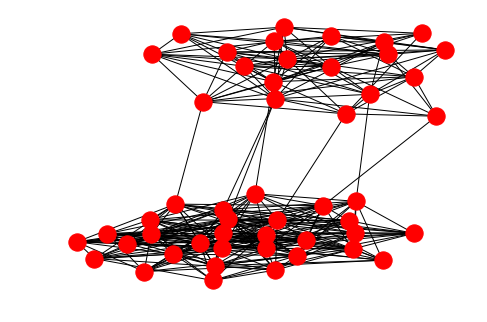

In [3]:
nx.draw(G)

### Key parameters
You have to set `EPSILON` and the number of rounds `K`.

In [4]:
EPSILON = 0.001
K = 20

### Basic functions
These are basic routines we shall use.

In [5]:
def clear_lengths(G):
    for e in G.edges:
        G[e[0]][e[1]]['length'] = 1

Since edges are undirected, we want to make sure that we keep edges in a single direction in our `congestions` dict.

In [6]:
def normalize_edge(u,v):
    if u < v:
        return (u,v)
    else:
        return (v,u)

In [7]:
def find_congestions(G):
    vmax = 0
    paths = dict(nx.all_pairs_dijkstra_path(G,weight='length'))
    
    congestions = dict([(normalize_edge(e[0],e[1]),0) for e in G.edges])
    vmax = 0
    for i in range(N):
        for j in range(N):
            if i < j:
                path = paths[i][j]
                for k in range(len(path)-1):
                    edge = normalize_edge(path[k],path[k+1])
                    if edge not in congestions:
                        congestions[edge] = 0
                    congestions[edge] += 1
                    if congestions[edge] > vmax:
                        vmax = congestions[edge]
    print('max congestion = ',vmax)
    return congestions

In [8]:
def update_lengths(G, congestions):
    max_length = 0
    for e in congestions.keys():
        u = e[0]
        v = e[1]
        G[u][v]['length'] *= ((1+EPSILON) ** congestions[e])
        max_length = max([G[u][v]['length'],max_length])
    #print("Max length = ",max_length)

### Main routing algorithm
We will repeatedly route flows through all-pair shortest paths for `k` rounds and average them out.

In [9]:
def route_flows(G, k):
    total_congestions = {}
    clear_lengths(G)
    for i in range(k):
        congestions = find_congestions(G)
        update_lengths(G, congestions)
        
        for e in congestions.keys():
            if e not in total_congestions:
                total_congestions[e] = 0
            total_congestions[e] += float(congestions[e])/k
    return total_congestions

Let's try and plot the result

In [10]:
cong = route_flows(G, K)

max congestion =  157
max congestion =  191
max congestion =  139
max congestion =  123
max congestion =  133
max congestion =  155
max congestion =  138
max congestion =  131
max congestion =  151
max congestion =  137
max congestion =  139
max congestion =  144
max congestion =  147
max congestion =  126
max congestion =  139
max congestion =  180
max congestion =  126
max congestion =  149
max congestion =  126
max congestion =  162


In [11]:
vmax = max(cong.values())
print("Max average congestion is",vmax)

Max average congestion is 88.65


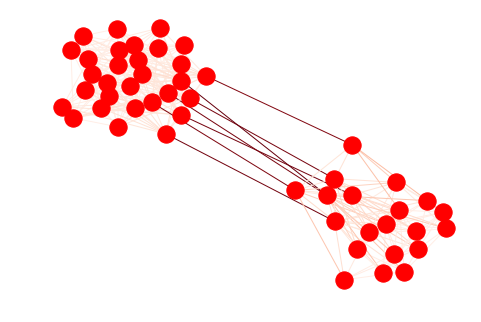

In [12]:
from matplotlib import pyplot as plt

#edge_color=[cong[e] for e in G.edges]
#print(edge_color)
nx.draw(G,edge_cmap=plt.get_cmap('Reds'),edge_vmin=0,edge_vmax=vmax,
       edge_color=[cong[e] for e in G.edges])